In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
#importing data
file_paths = {
    'trop': r'C:\Users\nadia\Desktop\report0\arxeia\afglt.dat',
    'midsum': r'C:\Users\nadia\Desktop\report0\arxeia\afglms.dat',
    'midwin': r'C:\Users\nadia\Desktop\report0\arxeia\afglmw.dat',
    'subarcs': r'C:\Users\nadia\Desktop\report0\arxeia\afglss.dat',
    'subarcw': r'C:\Users\nadia\Desktop\report0\arxeia\afglsw.dat',
}


In [21]:
# Thank you Eva for the dataframe trouble! 

def main():
    for region, file_path in file_paths.items():

        df = pd.read_csv(file_path, delim_whitespace=True, comment='#', header=None, skiprows=1)
        df.columns = ['z(km)', 'p(mb)', 'T(K)', 'air(cm-3)', 'o3(cm-3)', 'o2(cm-3)', 'h2o(cm-3)', 'co2(cm-3)', 'no2(cm-3)']


        min_z, max_z = selected_z_ranges[region]
        df = df[(df['z(km)'] >= min_z) & (df['z(km)'] <= max_z)]

        integral_h2o = np.trapz(df['h2o(cm-3)'].iloc[::-1], df['z(km)'].iloc[::-1])
        integral_o2 = np.trapz(df['o2(cm-3)'].iloc[::-1], df['z(km)'].iloc[::-1])
        integral_o3 = np.trapz(df['o3(cm-3)'].iloc[::-1], df['z(km)'].iloc[::-1])
        integral_co2 = np.trapz(df['co2(cm-3)'].iloc[::-1], df['z(km)'].iloc[::-1])
        integral_no2 = np.trapz(df['no2(cm-3)'].iloc[::-1], df['z(km)'].iloc[::-1])
        integral_air = np.trapz(df['air(cm-3)'].iloc[::-1], df['z(km)'].iloc[::-1])


        h2o_air_ratio = (integral_h2o / integral_air) * 100
        o2_air_ratio = (integral_o2 / integral_air) * 100
        o3_air_ratio = (integral_o3 / integral_air) * 100
        co2_air_ratio = (integral_co2 / integral_air) * 100
        no2_air_ratio = (integral_no2 / integral_air) * 100


        ratios['Region'].append(region)
        ratios['h2o/air (%)'].append(h2o_air_ratio)
        ratios['o2/air (%)'].append(o2_air_ratio)
        ratios['o3/air (%)'].append(o3_air_ratio)
        ratios['co2/air (%)'].append(co2_air_ratio)
        ratios['no2/air (%)'].append(no2_air_ratio)


ratios_df = pd.DataFrame(ratios)
print(ratios_df)

    Region  h2o/air (%)  o2/air (%)  o3/air (%)  co2/air (%)   no2/air (%)
0     trop     0.000315   20.913703    0.000386     0.033022  2.860681e-07
1   midsum     0.000386   20.913095    0.000380     0.033021  2.933525e-07
2   midwin     0.000484   20.913804    0.000667     0.033022  6.161500e-07
3  subarcs     0.000496   20.916183    0.000562     0.033026  5.023008e-07
4  subarcw     0.000500   20.916278    0.000552     0.033026  5.774144e-07


In [22]:
#bar plot
def bar(layer,percentile,gas):
    colour = ['limegreen', 'plum', 'purple', 'skyblue', 'blue']
    plt.figure(figsize=(12,6))
    plt.bar(ratios_df['Region'], ratios_df[percentile], color=colour, edgecolor ='black', width = 0.6)
    plt.title(str(layer)+' percentage (%) of '+ str(gas)+ ' in different latitudes and season ',fontsize=14)
    plt.ylabel('Percentage (%) of '+ str(gas)+ ' in ' +str(layer),fontsize=14)
    plt.xticks(rotation=0,fontsize=14)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

In [23]:
# defining stratosphere based on code from report01

selected_z_ranges = {
    'trop': (18, 45),
    'midsum': (18, 45),
    'midwin': (30, 45),
    'subarcs': (24, 45),
    'subarcw': (27.5, 47.5),
}

# defining troposphere based on code from report01  
#selected_z_ranges = {
#    'trop': (0, 17),
#    'midsum': (0, 17),
#    'midwin': (0, 17),
#    'subarcs': (0, 29),
#    'subarcw': (0, 27),
#}

ratios = {'Region': [], 'h2o/air (%)': [], 'o2/air (%)': [], 'o3/air (%)': [], 'co2/air (%)': [], 'no2/air (%)': []}

In [24]:
main()

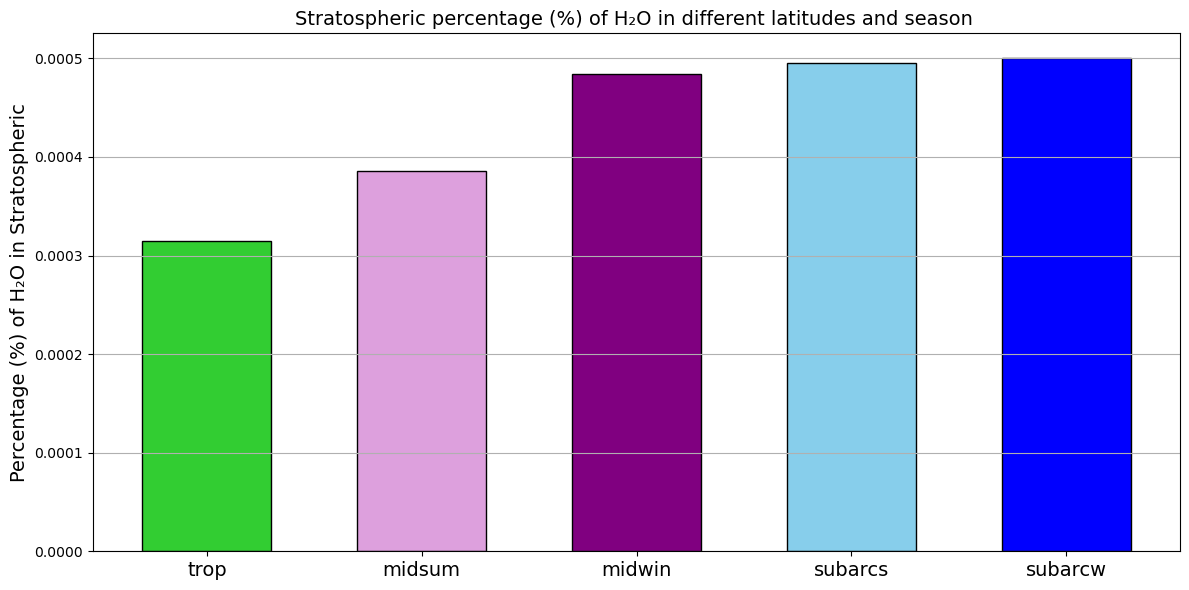

In [25]:
bar('Stratospheric','h2o/air (%)',"H₂O")

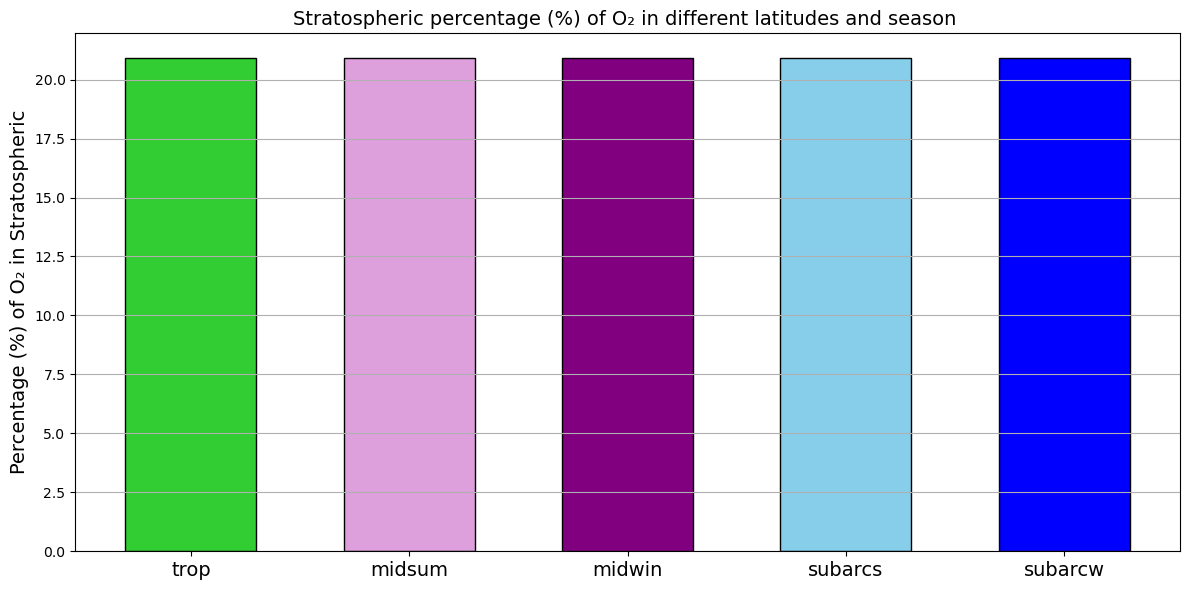

In [26]:
bar('Stratospheric','o2/air (%)',"O₂")

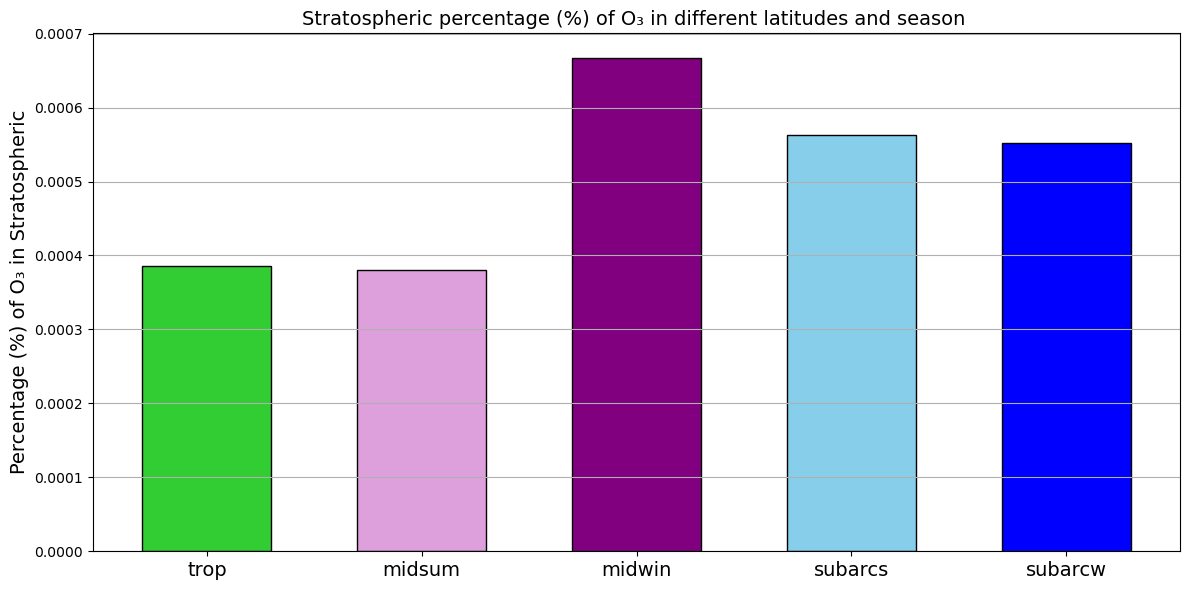

In [27]:
bar('Stratospheric','o3/air (%)',"O₃")

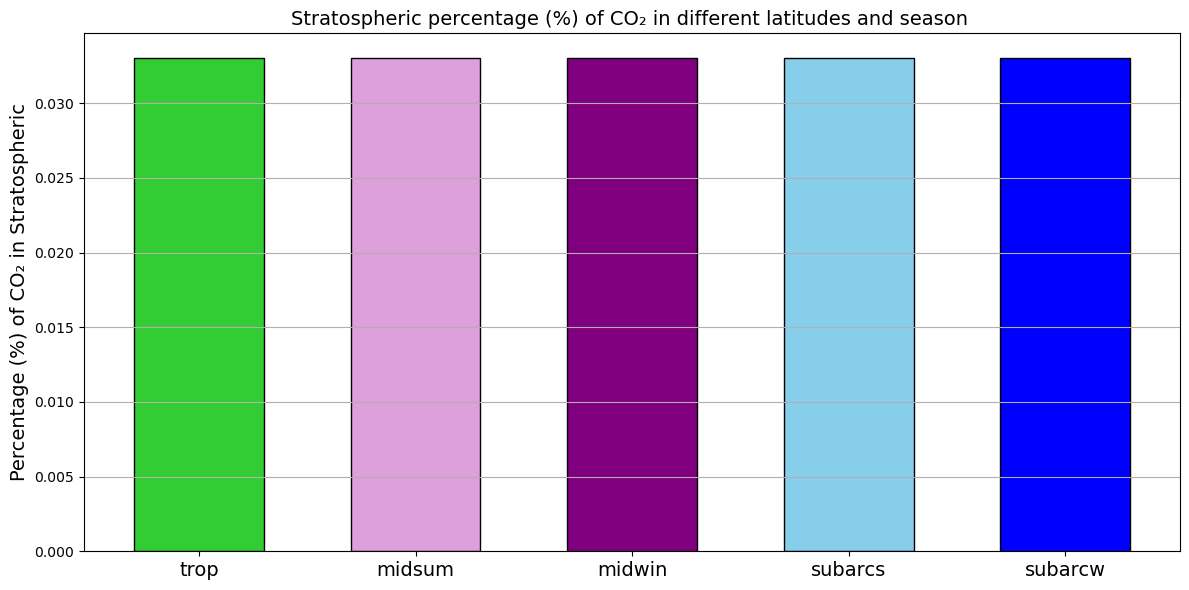

In [28]:
bar('Stratospheric','co2/air (%)',"CO₂")

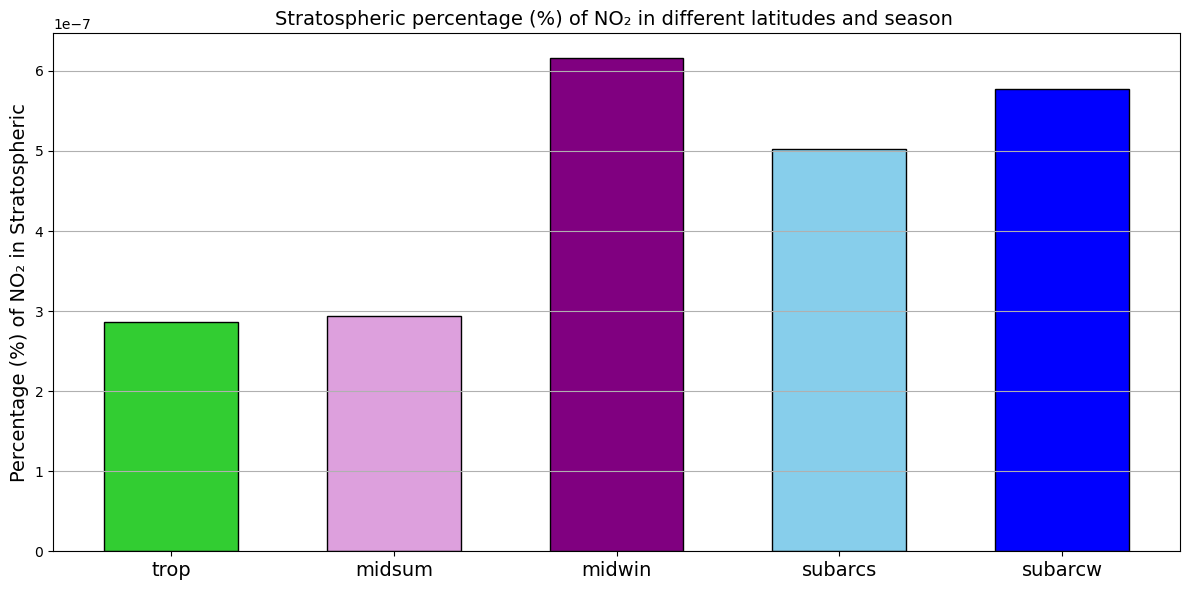

In [29]:
bar('Stratospheric','no2/air (%)',"NO₂")